In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('max_columns', 100)
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
color_pal = sns.color_palette(n_colors=10)

In [2]:
train = pd.read_csv('/input/data-science-bowl-2019/train.csv')

In [3]:
print(train.shape)
train.head()

(11341042, 11)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [4]:
specs = pd.read_csv('/input/data-science-bowl-2019/specs.csv')

In [5]:
print(specs.shape)
specs.head()

(386, 3)


,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [6]:
train_labels = pd.read_csv('/input/data-science-bowl-2019/train_labels.csv')

In [7]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


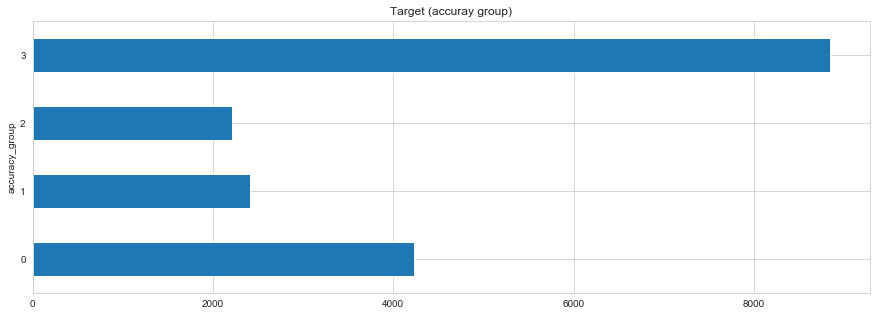

In [8]:
train_labels.groupby('accuracy_group')['game_session'].count() \
    .plot(kind='barh', figsize=(15, 5), title='Target (accuray group)')
plt.show()

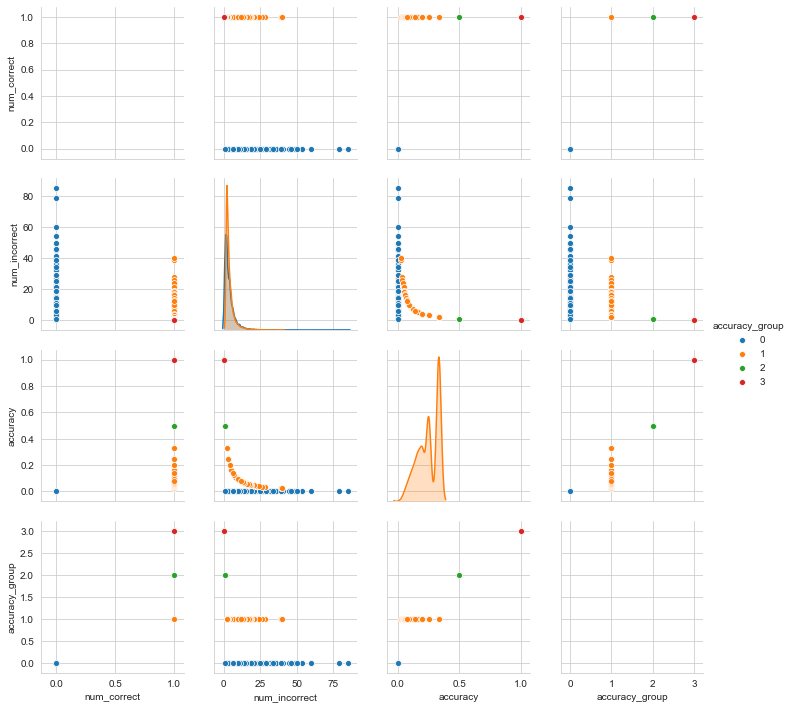

In [9]:
sns.pairplot(train_labels, hue='accuracy_group')
plt.show()

In [10]:
train['event_id_as_int'] = train['event_id'].apply(lambda x: int(x, 16))
train['game_session_as_int'] = train['game_session'].apply(lambda x: int(x, 16))

In [11]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['date'] = train['timestamp'].dt.date
train['hour'] = train['timestamp'].dt.hour
train['weekday_name'] = train['timestamp'].dt.weekday_name

In [12]:
print(f'Train data has shape: {train.shape}')

Train data has shape: (11341042, 16)


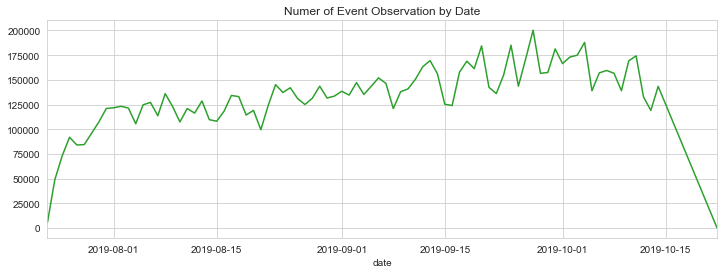

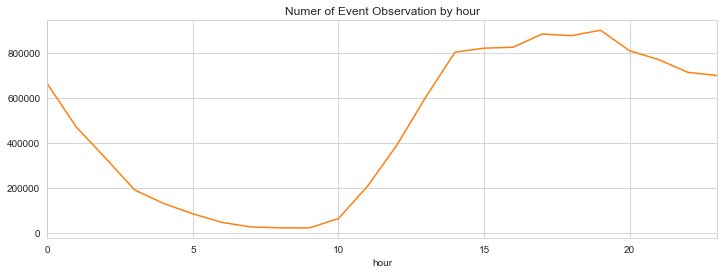

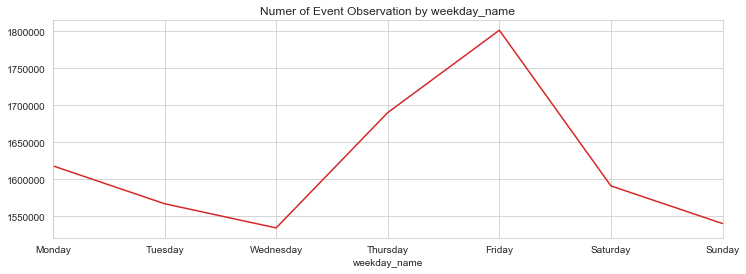

In [14]:
train.groupby('date')['event_id'] \
    .agg('count') \
    .plot(figsize=(12, 4),
          title='Numer of Event Observation by Date',
          color=color_pal[2])
plt.show()
train.groupby('hour')['event_id'] \
    .agg('count') \
    .plot(title='Numer of Event Observation by hour',
          figsize=(12, 4),
          color=color_pal[1])
plt.show()
train.groupby('weekday_name')['event_id'] \
    .agg('count').T[['Monday','Tuesday','Wednesday',
                     'Thursday','Friday','Saturday',
                     'Sunday']] \
    .plot(title='Numer of Event Observation by weekday_name',
          figsize=(12, 4),
          color=color_pal[3])
plt.show()

In [28]:
te = train.groupby('weekday_name')['event_id'] \
    .agg('count')

In [32]:
te.T[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

weekday_name
Monday       1617978
Tuesday      1566807
Wednesday    1534122
Thursday     1689996
Friday       1801243
Saturday     1590883
Sunday       1540013
Name: event_id, dtype: int64

In [16]:
train['installation_id'].nunique()

17000

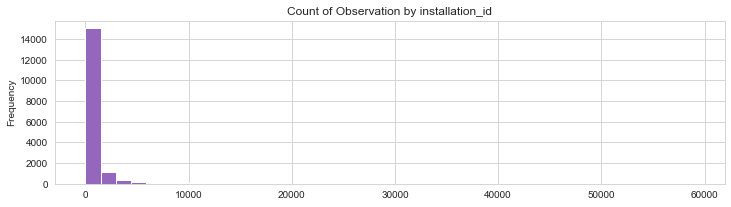

In [18]:
train.groupby('installation_id')['event_id'] \
    .agg('count') \
    .plot(kind='hist',
          title='Count of Observation by installation_id',
          bins=40,
          figsize=(12, 3),
          color=color_pal[4]
         )
plt.show()

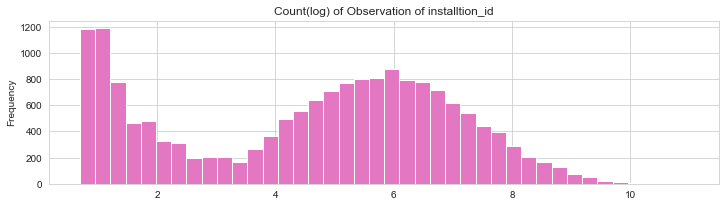

In [21]:
train.groupby('installation_id')['event_id'] \
    .agg('count') \
    .apply(np.log1p) \
    .plot(kind='hist',
          title='Count(log) of Observation of installtion_id',
          bins=40,
          figsize=(12, 3),
          color=color_pal[6]
         )
plt.show()

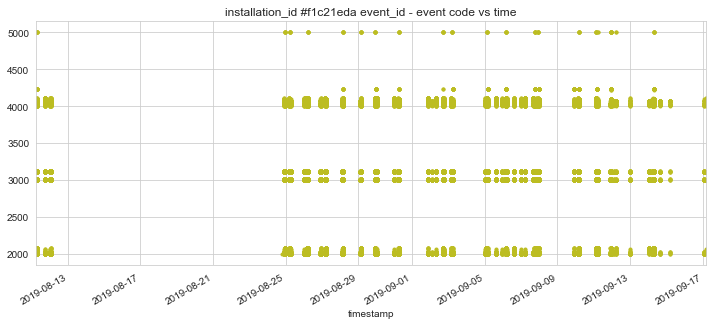

In [26]:
train.query('installation_id == "f1c21eda"') \
    .set_index('timestamp')['event_code'] \
    .plot(figsize=(12, 5),
          title='installation_id #f1c21eda event_id - event code vs time',
          style='.',
          color=color_pal[8])
plt.show()

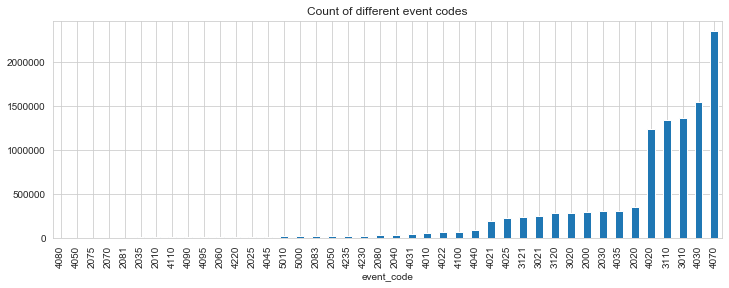

In [27]:
train.groupby('event_code') \
    .count()['event_id'] \
    .sort_values() \
    .plot(kind='bar',
          figsize=(12, 4),
          title='Count of different event codes')
plt.show()

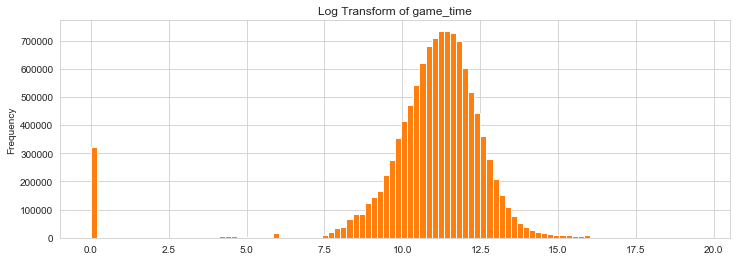

In [28]:
train['game_time'].apply(np.log1p) \
    .plot(kind='hist',
          figsize=(12, 4),
          bins=100,
          title='Log Transform of game_time',
          color=color_pal[1])
plt.show()

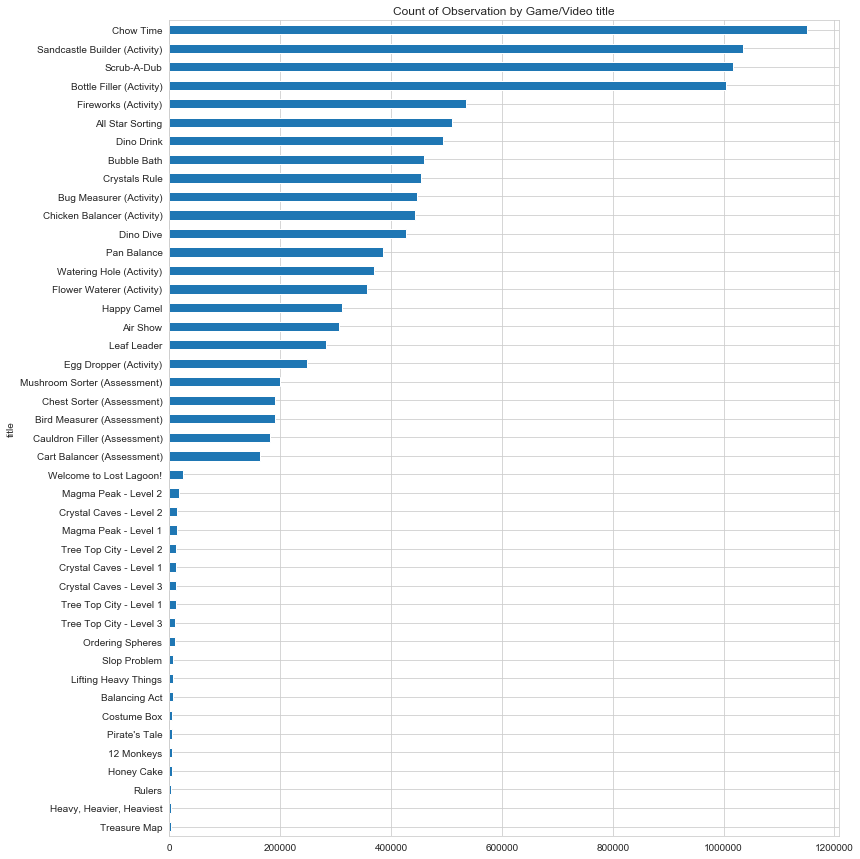

In [30]:
train.groupby('title') \
    .count()['event_id'] \
    .sort_values() \
    .plot(kind='barh',
          title='Count of Observation by Game/Video title',
          figsize=(12, 15))
plt.show()

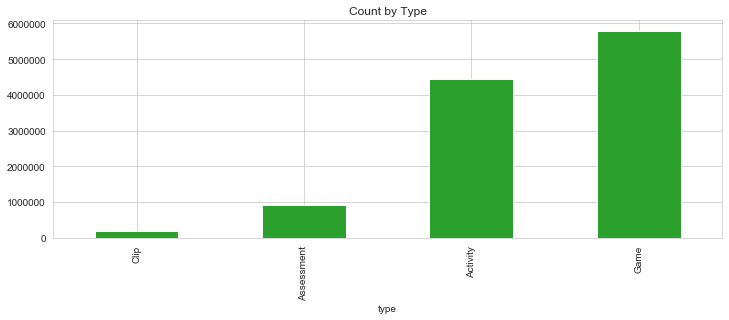

In [31]:
train.groupby('type')['event_id'] \
    .count() \
    .sort_values() \
    .plot(kind='bar',
          figsize=(12, 4),
          title='Count by Type',
          color=color_pal[2])
plt.show()

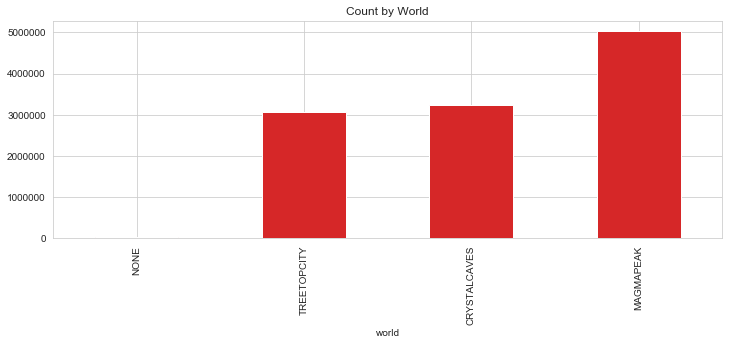

In [33]:
train.groupby('world')['event_id'] \
    .count() \
    .sort_values() \
    .plot(kind='bar',
          title='Count by World',
          color=color_pal[3],
          figsize=(12, 4))
plt.show()